In [1]:
import os

import numpy as nrc_py
import pandas as pnl_data

In [2]:
def read_data_from_csv(path):

    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pnl_data.read_csv(path)
    column_list = data.columns.values.tolist()
    column_list.remove('id')

    if 'target' in column_list:
        # for the training dataset, label column is provided.
        column_list.remove('target')
        X = data[column_list].values
        y = data['target'].astype('int').values
        return X, y
    else:
        # for the testing dataset, label column is not provided.
        X = data[column_list].values
        return X

In [3]:
"""
This cell is for data analyzing

"""
data = pnl_data.read_csv('../dont-overfit-ii/train.csv')
data.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [4]:
"""
This cell is for data analyzing

"""
data.info()
data.shape # with column id and target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


(250, 302)

In [5]:
"""
This cell is for data analyzing

"""
data.isnull().sum()
data.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


In [6]:
"""
This cell is for data analyzing

"""
data.corr()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
id,1.000000,-0.151498,0.029519,-0.018465,-0.176930,0.024949,0.016726,-0.016244,0.084511,-0.037473,...,-0.026179,0.104573,-0.076038,0.061150,0.022245,-0.064452,-0.027832,-0.032826,0.000657,-0.022638
target,-0.151498,1.000000,0.108966,-0.073319,-0.015141,0.011549,-0.114726,-0.050329,-0.057063,0.004239,...,0.039675,0.055694,-0.088930,-0.034363,-0.031964,-0.170501,0.007434,0.056810,-0.134760,-0.075475
0,0.029519,0.108966,1.000000,-0.003871,-0.010487,-0.047819,0.013967,0.070091,-0.022537,0.002832,...,-0.023230,0.053416,-0.143668,-0.007530,-0.060824,-0.024839,-0.051288,0.029143,0.065951,0.038523
1,-0.018465,-0.073319,-0.003871,1.000000,0.013573,-0.018884,0.086743,-0.028023,-0.032914,-0.066416,...,-0.006300,-0.077365,-0.021583,-0.054171,-0.046174,0.042820,-0.127499,0.065883,0.055470,-0.056612
2,-0.176930,-0.015141,-0.010487,0.013573,1.000000,-0.031620,0.088980,-0.050191,0.024674,0.035260,...,-0.111172,-0.027842,-0.013653,-0.009691,-0.051292,-0.028690,-0.071835,0.069395,0.083946,0.025507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.064452,-0.170501,-0.024839,0.042820,-0.028690,-0.005016,-0.050318,0.026868,-0.023192,0.032648,...,-0.030738,-0.020251,0.015083,-0.139025,-0.015920,1.000000,-0.072721,-0.036572,-0.034341,0.097052
296,-0.027832,0.007434,-0.051288,-0.127499,-0.071835,0.034551,-0.030017,0.070294,0.036903,-0.006235,...,0.016047,0.042079,-0.045879,-0.011766,0.125693,-0.072721,1.000000,-0.002007,0.056297,0.040264
297,-0.032826,0.056810,0.029143,0.065883,0.069395,0.089963,0.029747,0.069243,0.037912,0.014628,...,0.048496,0.066474,-0.025382,0.021148,-0.103255,-0.036572,-0.002007,1.000000,0.039793,-0.141078
298,0.000657,-0.134760,0.065951,0.055470,0.083946,-0.066438,-0.008517,-0.048009,0.171640,-0.031094,...,-0.125556,0.087400,0.008096,-0.005422,-0.063242,-0.034341,0.056297,0.039793,1.000000,-0.092017


In [7]:
X, y = read_data_from_csv('../dont-overfit-ii/train.csv')
print('Shape of X:', X.shape)  # sample, feature
print('Shape of y:', y.shape)  # sample (0, 1)

Shape of X: (250, 300)
Shape of y: (250,)


In [8]:
"""
This cell is for data analyzing

"""
print(X)
print(X[0])
#print(y)  # (0, 1)
#print(type(y[0]))

[[-0.098  2.165  0.681 ... -0.414  1.038 -1.065]
 [ 1.081 -0.973 -0.383 ... -1.099 -0.936  0.973]
 [-0.523 -0.089 -0.348 ...  0.004  0.8   -1.211]
 ...
 [ 1.411 -1.465  0.119 ...  0.76   0.168 -0.719]
 [ 0.62   1.04   0.184 ... -0.805  2.029 -0.423]
 [ 0.489  0.403  0.139 ... -1.454 -0.625  1.474]]
[-0.098  2.165  0.681 -0.614  1.309 -0.455 -0.236  0.276 -2.246  1.825
 -0.912 -0.107  0.305  0.102  0.826  0.417  0.177 -0.673 -0.503  1.864
  0.41  -1.927  0.102 -0.931  1.763  1.449 -1.097 -0.686 -0.25  -1.859
  1.125  1.009 -2.296  0.385 -0.876  1.528 -0.144 -1.078 -0.403  0.005
  1.405 -0.044 -0.458  0.579  2.929  0.833  0.761  0.737  0.669  0.717
 -1.542 -1.847 -0.445  1.238 -0.84  -1.891 -1.531 -0.396 -0.927  2.072
  0.946 -1.105  0.008  0.933 -1.41  -0.77   1.74  -1.504 -0.391 -1.551
 -1.415 -0.974  0.796 -2.464 -1.424  1.23   0.219  0.13  -0.371 -0.93
  1.851  1.292 -0.38   1.318  1.146 -0.399  2.227  0.447  0.87   1.42
 -1.675  0.019  0.06   0.768  2.563  0.638  1.164  0.407 -1.556

In [9]:
X = X.tolist()
for i in range(0, 250):
    X[i].append(1)

print(type(X[0]))
print(type(X))

<class 'list'>
<class 'list'>


In [10]:
print(X[1])
print(len(X[1]))

[1.081, -0.973, -0.383, 0.326, -0.428, 0.317, 1.172, 0.352, 0.004, -0.291, 2.907, 1.085, 2.144, 1.54, 0.584, 1.133, 1.098, -0.237, -0.498, 0.283, -1.1, -0.417, 1.382, -0.515, -1.519, 0.619, -0.128, 0.866, -0.54, 1.238, -0.227, 0.269, -0.39, -2.721, 1.659, 0.106, -0.121, 1.719, 0.411, -0.303, -0.307, 0.38, 0.503, -1.32, 0.339, -1.102, -0.947, 0.267, 0.695, 0.167, 0.188, -1.082, -0.872, 0.66, 0.051, 0.303, -0.553, -0.771, 0.588, 0.472, 1.315, -0.467, -0.064, 1.808, 0.633, 1.221, 1.112, 1.133, -0.543, -2.144, 0.151, -0.813, 1.966, -1.19, 0.19, -0.473, 0.002, 1.195, -0.799, 1.117, -0.759, -0.661, 0.406, -0.846, -0.035, -1.634, -0.011, 0.503, 0.61, -1.822, -0.03, 1.188, -0.006, -0.279, 1.914, 0.62, -1.495, 1.787, -0.305, 0.602, -1.208, 0.893, 0.379, 1.396, 0.581, -0.475, -0.056, -0.691, -0.783, -1.485, 1.911, -2.4, -2.372, -0.178, 1.55, -0.228, 0.674, 0.987, 1.373, -0.373, 0.629, 0.229, -0.63, -0.175, 0.548, 0.074, -2.09, -0.625, -1.131, 1.111, -0.1, 0.574, -0.66, -1.113, 0.802, -0.093, 1.3

In [11]:
"""
    
    The model design starts here!!!
    The model design starts here!!!
    The model design starts here!!!
    
"""

'\n    \n    The model design starts here!!!\n    The model design starts here!!!\n    The model design starts here!!!\n    \n'

In [12]:
def step_Function(x):
    return 1 if x > 0 else 0
def linear_Activation_Function(a, x):
    return a*x
def sigmoid_Activation_Function(x):
    return 1./(1+nrc_py.exp(-x))
def tanh_Activation_Function(x):
    return 2*sigmoid_Activation_Function(2*x)-1
""" Reference: https://towardsdatascience.com/what-is-activation-function-1464a629cdca """

' Reference: https://towardsdatascience.com/what-is-activation-function-1464a629cdca '

In [13]:
#print(y)
#print(y[0])
import random
def initializeWeights(y, numberOfInputs):
    rand = []
    for i in range(0, numberOfInputs):
        # Last one for the Bias
        rand.append(random.uniform(-0.01, 0.01))
    #print(len(rand))
    #print(nrc_py.array(rand).shape, y.shape)
    return nrc_py.array(rand)

def Layer1(x, L1): 
    for i in range(0, 100): 
        sum = 0 
        # For the first hidden Layer, we output 100 neurons 
        for j in range(0, 301): 
            sum = sum + (x[j] * weightsForLayerOne[i][j])
        #print("sum = ", sum)
        sum = tanh_Activation_Function(sum)
        L1.append(sum) 
        #print(sum) # For Debugging
    return L1

def Layer2(x, L2): 
    for i in range(0, 1): 
        sum = 0 
        # For the first hidden Layer, we output 100 neurons 
        for j in range(0, 101): 
            sum = sum + (x[j] * weightsForLayerOutput[i][j])
        #print(sum) # For Debugging
        L2 = step_Function(sum)
    return L2


def Error_Function(L2, y):
    #print(L2) # For Debugging
    #print(y) # For Debugging
    if L2 - y == 0:
        return 0
    else: return y - L2

In [14]:
learning_Rate = 0.001
Accuracy = []

weightsForLayerOne = nrc_py.empty((100, 301))
weightsForLayerOutput = nrc_py.empty((1, 101)) 
#print(weightsForLayerOne.shape) 
for i in range(0, 100): 
    weightsForLayerOne[i] = initializeWeights(weightsForLayerOne[i], 301) 
for i in range(0, 1): 
    weightsForLayerOutput[i] = initializeWeights(weightsForLayerOutput[i], 101)
    
#print(weightsForLayerOne) # For Debugging
#print(weightsForLayerOutput) # For Debugging
#print(len(weightsForLayerOne)) # For Debugging 
#print(weightsForLayerOne[1].shape) # For Debugging

e = 1
Acc = 0
while Acc < 0.824:
    numberOfCorrectPredictions = 0
    for iterations in range(0, 250):
        L1 = [] # Layer 1
        L2 = 0 # Layer 2
        L1 = Layer1(X[iterations], L1)
        #print(len(L1)) # For Debugging (100)
        L1.append(1)
        #print(len(L1)) # For Debugging (101)
        L2 = Layer2(L1, L2)
        #print(L1) # For Debugging

        error = Error_Function(L2, y[iterations])
        if error != 0:
            """
            for i in range(0, 101):
                #print(weightsForLayerOutput[0][i]) # For Debugging
                weightsForLayerOutput[0][i] = weightsForLayerOutput[0][i] + (learning_Rate * error * L1[i])
                #print("update V = ", weightsForLayerOutput[0][i]) # For Debugging
            """
            for i in range(0, 100):
                for j in range(0, 301):
                    #print(weightsForLayerOutput[0][i]) # For Debugging
                    weightsForLayerOne[i][j] = weightsForLayerOne[i][j] + (learning_Rate * error * weightsForLayerOutput[0][i] * L1[i] * (1 - L1[i]) * X[iterations][j])
        else:
            numberOfCorrectPredictions = numberOfCorrectPredictions + 1
    
    #print(weightsForLayerOutput) # For Debugging
    print(numberOfCorrectPredictions, ", ", e)
    Acc = numberOfCorrectPredictions / 250
    print("Accuracy = ", Acc )
    Accuracy.append(Acc)
    e = e + 1


125 ,  1
Accuracy =  0.5
125 ,  2
Accuracy =  0.5
125 ,  3
Accuracy =  0.5
125 ,  4
Accuracy =  0.5
125 ,  5
Accuracy =  0.5
126 ,  6
Accuracy =  0.504
126 ,  7
Accuracy =  0.504
126 ,  8
Accuracy =  0.504
126 ,  9
Accuracy =  0.504
126 ,  10
Accuracy =  0.504
126 ,  11
Accuracy =  0.504
126 ,  12
Accuracy =  0.504
125 ,  13
Accuracy =  0.5
125 ,  14
Accuracy =  0.5
125 ,  15
Accuracy =  0.5
125 ,  16
Accuracy =  0.5
125 ,  17
Accuracy =  0.5
124 ,  18
Accuracy =  0.496
125 ,  19
Accuracy =  0.5
125 ,  20
Accuracy =  0.5
125 ,  21
Accuracy =  0.5
125 ,  22
Accuracy =  0.5
125 ,  23
Accuracy =  0.5
125 ,  24
Accuracy =  0.5
125 ,  25
Accuracy =  0.5
124 ,  26
Accuracy =  0.496
124 ,  27
Accuracy =  0.496
124 ,  28
Accuracy =  0.496
124 ,  29
Accuracy =  0.496
124 ,  30
Accuracy =  0.496
123 ,  31
Accuracy =  0.492
124 ,  32
Accuracy =  0.496
124 ,  33
Accuracy =  0.496
124 ,  34
Accuracy =  0.496
124 ,  35
Accuracy =  0.496
124 ,  36
Accuracy =  0.496
123 ,  37
Accuracy =  0.492
123 ,  

KeyboardInterrupt: 

In [ ]:
# Start testing with Unseen Data
UnseenData = read_data_from_csv('../dont-overfit-ii/test.csv')

In [ ]:
print('Shape of UnseenData:', UnseenData.shape)  # k_sample, m_feature

In [ ]:
UnseenData = UnseenData.tolist()
for i in range(0, 19750):
    UnseenData[i].append(1)

print(len(UnseenData[1]))

In [ ]:
predictedUnseenLabels = []
for iterations in range(0, 19750):
    L1 = [] # Layer 1
    L2 = 0 # Layer 2
    L1 = Layer1(UnseenData[iterations], L1)
    L1.append(1)
    L2 = Layer2(L1, L2)
    #print(len(L1)) # For Debugging
    #print(L1) # For Debugging
    predictedUnseenLabels.append(L2)

In [ ]:
print(len(predictedUnseenLabels)) # For Debugging
print(predictedUnseenLabels) # For Debugging

In [ ]:
id_header = []
for i in range(250, 20000):
    id_header.append(i)

output = pnl_data.DataFrame({'id' : id_header, 'target': predictedUnseenLabels})
output.to_csv('result.csv', index=False)

In [ ]:
#xxx = pnl_data.read_csv('result.csv')
#xxx.info()
#xxx.shape

In [15]:
print(len(Accuracy)) # For Debugging

77


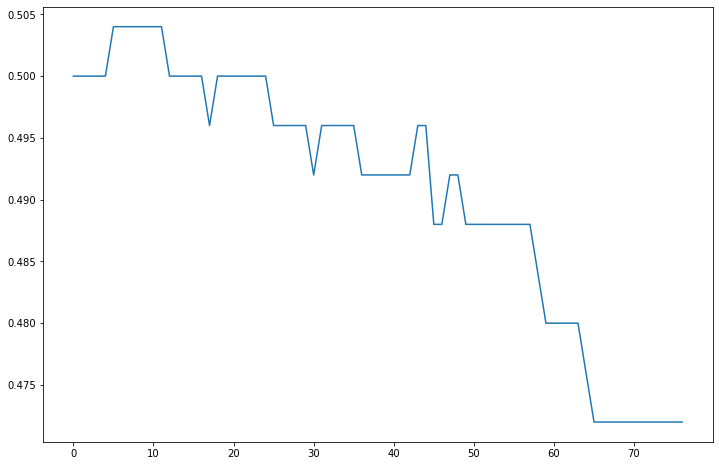

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.plot(Accuracy)
plt.savefig('plot_Trial5.2.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
max(Accuracy)

0.504